In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [34]:
print(sm.datasets.sunspots.NOTE)
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



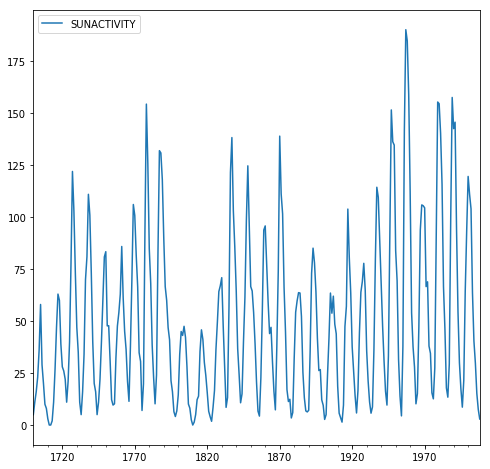

In [35]:
dta.plot(figsize=(8,8))
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [36]:
#split into test and train
percentage = 0.6
series = dta['SUNACTIVITY'].tolist()
size = int(len(series) * 0.66)
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train , order = (9,0,0))
model_fit = model.fit()

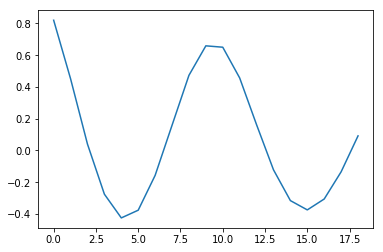

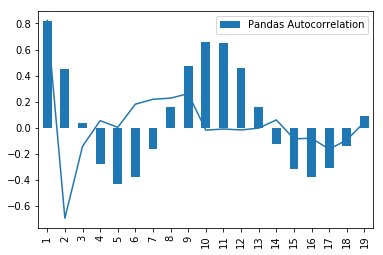

203


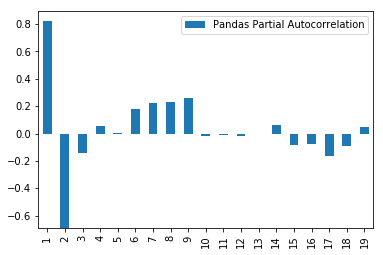

In [39]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

203
predicted=21.289847, expected=24.400000
predicted=44.790806, expected=42.000000
predicted=50.639573, expected=63.500000
predicted=67.632831, expected=53.800000
predicted=43.069227, expected=62.000000
predicted=56.411958, expected=48.500000
predicted=35.949016, expected=43.900000
predicted=32.645831, expected=18.600000
predicted=8.619479, expected=5.700000
predicted=4.710162, expected=3.600000
predicted=16.133501, expected=1.400000
predicted=13.622564, expected=9.600000
predicted=26.058842, expected=47.400000
predicted=70.195890, expected=57.100000
predicted=59.251324, expected=103.900000
predicted=110.269303, expected=80.600000
predicted=58.298354, expected=63.600000
predicted=37.231850, expected=37.600000
predicted=24.555177, expected=26.100000
predicted=12.949669, expected=14.200000
predicted=13.940253, expected=5.800000
predicted=10.271122, expected=16.700000
predicted=34.330679, expected=44.300000
predicted=67.457459, expected=63.900000
predicted=74.116308, expected=69.000000
p

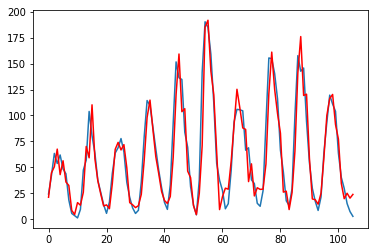

309


In [44]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test = [], []
history = train
for t in range(len(test)):
    model = ARIMA(history, order=(9,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    resid_test.append(test[t] - output[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predicted1, color='red')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  203
Model:                     ARMA(9, 0)   Log Likelihood                -823.876
Method:                       css-mle   S.D. of innovations             13.902
Date:                Thu, 04 May 2017   AIC                           1669.751
Time:                        15:12:27   BIC                           1706.197
Sample:                             0   HQIC                          1684.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.0438      5.822      7.222      0.000      30.634      53.454
ar.L1.y        1.2758      0.070     18.323      0.000       1.139       1.412
ar.L2.y       -0.5873      0.113     -5.182      0.0

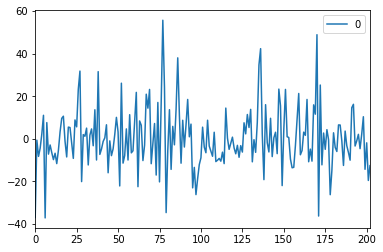

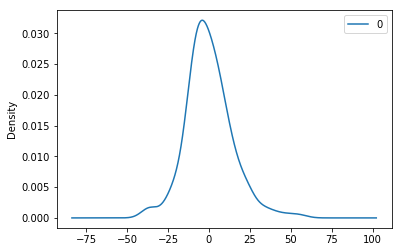

                0
count  203.000000
mean     0.083636
std     14.161018
min    -37.268777
25%     -8.376169
50%     -1.283486
75%      7.310472
max     55.722658
203


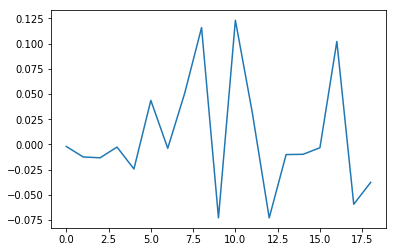

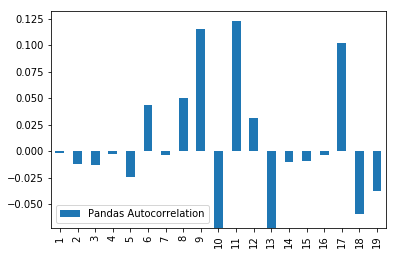

In [46]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train, order=(9,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals

In [69]:
"""
Hybrid Model
"""
window_size = 50
def make_model(window_size):
    model = Sequential()
    model.add(Dense(50, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(25, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#def make_lstm_model():
#   model = Sequential()
#   model.add(LSTM(
#        input_dim=1,
#        output_dim=50,
#        return_sequences=True))
#   model.add(Dropout(0.2))
#   model.add(LSTM(
#        100,
#        return_sequences=False))
#   model.add(Dropout(0.2))

#   model.add(Dense(
#        output_dim=1))
#   model.add(Activation("linear"))
#   model.compile(loss="mse", optimizer="rmsprop")
#   return model

model = make_model(50)
#lstm_model = make_lstm_model()
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(test_data) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
#new_train_X = np.reshape(new_train_X, (new_train_X.shape[0], new_train_X.shape[1], 1))
model.fit(new_train_X,new_train_Y, nb_epoch=500, batch_size=512, validation_split = .05)

Train on 100 samples, validate on 6 samples
Epoch 1/500
100/100 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0157
Epoch 2/500
100/100 [==============================] - 0s - loss: 0.0337 - val_loss: 0.0096
Epoch 3/500
100/100 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0055
Epoch 4/500
100/100 [==============================] - 0s - loss: 0.0169 - val_loss: 0.0037
Epoch 5/500
100/100 [==============================] - 0s - loss: 0.0136 - val_loss: 0.0044
Epoch 6/500
100/100 [==============================] - 0s - loss: 0.0142 - val_loss: 0.0066
Epoch 7/500
100/100 [==============================] - 0s - loss: 0.0170 - val_loss: 0.0080
Epoch 8/500
100/100 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0080
Epoch 9/500
100/100 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0070
Epoch 10/500
100/100 [==============================] - 0s - loss: 0.0166 - val_loss: 0.0056
Epoch 11/500
100/100 [=============

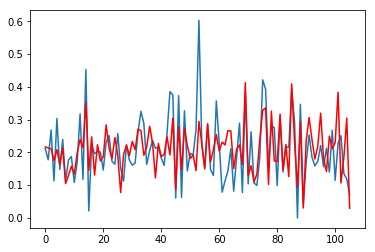

Test MSE: 173.075


In [77]:
test_extended = train.tolist()[-1*window_size:] + test_resid
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_train_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(new_train_Y)
pred = pd.DataFrame(predictions)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_resid,predictions_rescaled)
print('Test MSE: %.3f' % error)


In [80]:
pred_final = predictions_rescaled + predicted1
error = mse(test,pred_final)
print('Test MSE: %.3f' % error)

Test MSE: 173.075


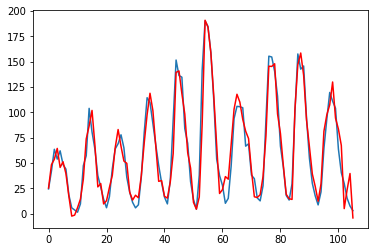

In [81]:
Y = pd.DataFrame(test)
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()